<table align="center" width=100%>
    <tr>
        <td width="15%">
            <img src="in_class.png">
        </td>
        <td>
            <div align="center">
                <font color="#21618C" size=8px>
                    <b>Assignment - 1 <br>
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

### About the dataset (Adult Income Data)

The dataset contains information about the individuals' age, gender, and several attributes affecting the income of a person. <br> Attribute information:

**age:** Age of an individual

**workclass:** Working class of the individual

**fnlwgt:** Weights based on the demographic characteristics

**education:** Highest education of the individual

**education.num:** Education encoded with unique numbers

**marital.status:** Marital status of the individual

**occupation:** Occupation of the individual

**relationship:** Relation of the individual in the family

**race:** Race of the individual

**sex:** Gender of the individual (0 = Male, 1 = Female)

**capital.gain:** Gain amount of the individual

**capital.loss:** Loss amount of the individual

**hours.per.week:** Working hours per week

**native.country:** The native country of the individual

**income:** Income of the individual

##  Table of Content

1. **[Understand the Dataset](#data)**
2. **[Measures of Central Tendency](#ct)**
3. **[Measures of Dispersion](#md)**
4. **[Distribution of the Data](#dist)**
5. **[Skewness and kurtosis](#sk)**
6. **[Correlation](#corr)**

**Import the required libraries**

In [190]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

**Load the adults income dataset and print first five observations**

In [191]:
df=pd.read_csv('adult_income.csv')
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,1,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,1,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,1,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,1,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,1,0,3900,40,United-States,<=50K


### Let's begin with some hands-on practice exercises

<a id="data"> </a>
## 1. Understand the Dataset

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>1. Find out the numerical and categorical variables in the data. If any variable is wrongly identified, do the needful
</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [193]:
df.head(2)

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,1,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,1,0,4356,18,United-States,<=50K


In [194]:
df.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education.num      int64
marital.status    object
occupation        object
relationship      object
race              object
sex                int64
capital.gain       int64
capital.loss       int64
hours.per.week     int64
native.country    object
income            object
dtype: object

`Datatype of variable` **`"sex"`** `is` **`"int64"`**`.i.e it is wrongly identified, 
 Hence we need to convert it into `**`"object"`**` datatype.`

In [195]:
#Converting datatype of "SEX" into Object
df['sex']=df['sex'].astype(object)

In [196]:
df['sex'].dtypes

dtype('O')

In [197]:
df.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education.num      int64
marital.status    object
occupation        object
relationship      object
race              object
sex               object
capital.gain       int64
capital.loss       int64
hours.per.week     int64
native.country    object
income            object
dtype: object

**`Now all the datatypes of variables are correct.`**

_______________________

<a id="ct"> </a>
## 2. Measures of Central Tendency

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>2. What is the average age of males and females in the data?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [198]:
df.head(2)

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,1,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,1,0,4356,18,United-States,<=50K


In [199]:
mean_age_across_gender=df.groupby('sex')['age'].mean()
print(f"Average age for Male is { mean_age_across_gender [0]}\n")
print(f"Average age for Female is { mean_age_across_gender [1]}")

Average age for Male is 39.43354749885268

Average age for Female is 36.85823043357163


____________________________

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>3. What is the value under which 95% of the capital gain would lie? </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [200]:
df.head(2)

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,1,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,1,0,4356,18,United-States,<=50K


In [201]:
Q_95 = df['capital.gain'].quantile(0.95)
print(f'{ Q_95 } is the value under which 95 % of "capital.gain" lies "')

5013.0 is the value under which 95 % of "capital.gain" lies "


___________________________

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>4. Identify the qualification of most of the individuals </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [202]:
df.head(2)

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,1,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,1,0,4356,18,United-States,<=50K


In [203]:
qualification = df['education'].value_counts().index[0]
print(f"Qualification of most of the indivisuals is '{ qualification }'")

Qualification of most of the indivisuals is 'HS-grad'


Qualification of 10501 indivisuals is 'HS-grad' 


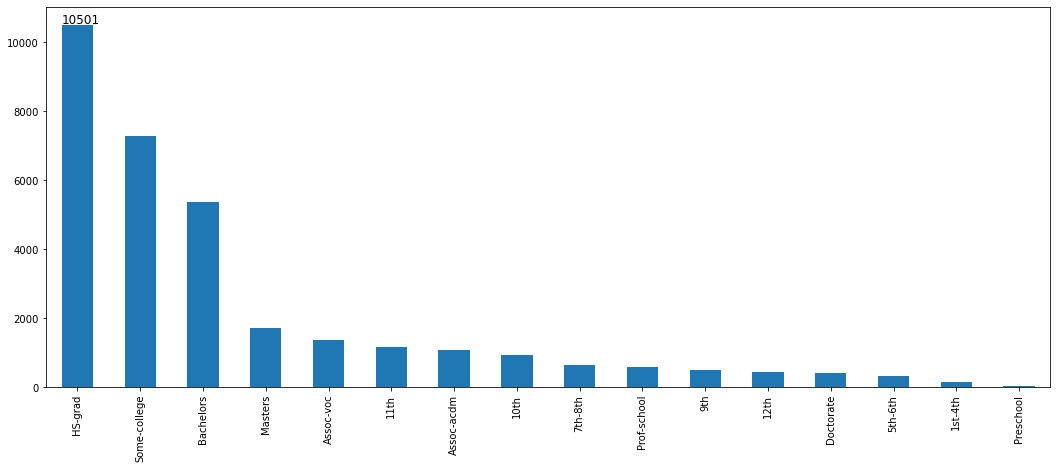

In [204]:
plt.rcParams['figure.figsize']=[18,7]
a = df[['education']].value_counts().max()
print(f"Qualification of { a } indivisuals is '{ qualification }' ")
plt.text(x=-0.25,y=df['education'].value_counts().max()+30,s = df['education'].value_counts().max(),fontsize=12)
df['education'].value_counts().plot(kind='bar')
plt.show()

Qualification of 32 % indivisuals is 'HS-grad' 


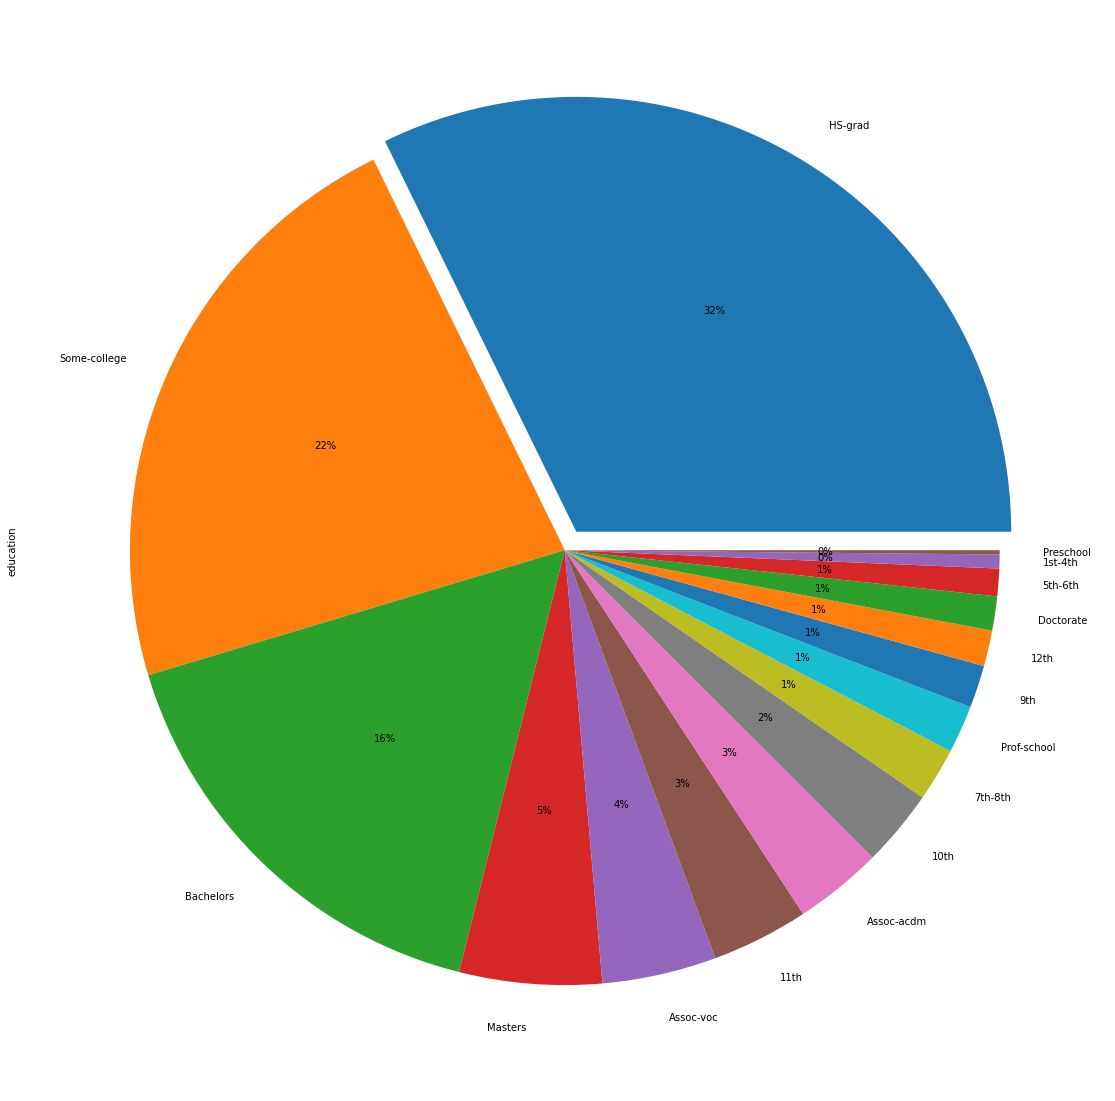

In [205]:
plt.figure(figsize = ( 20 , 20 ))
a = int(np.round((df[['education']].value_counts().max()/df.shape[0])*100))
print(f"Qualification of { a } % indivisuals is '{ qualification }' ")
df['education'].value_counts().plot(kind='pie',autopct = "%i%%",explode = [0.05,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0])
plt.show()

#### Insight:
    Qualification of 10501 indivisuals is "HS-grad" which is 32 % of overall Population.

__________________________________

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>5. Find the middle most observation of age for different working class</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [206]:
df.head(2)

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,1,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,1,0,4356,18,United-States,<=50K


Median 'age' across differenct 'workclass' :
--------------------------------------------
workclass
?                   35
Federal-gov         43
Local-gov           41
Never-worked        18
Private             35
Self-emp-inc        45
Self-emp-not-inc    44
State-gov           39
Without-pay         57
Name: age, dtype: int64


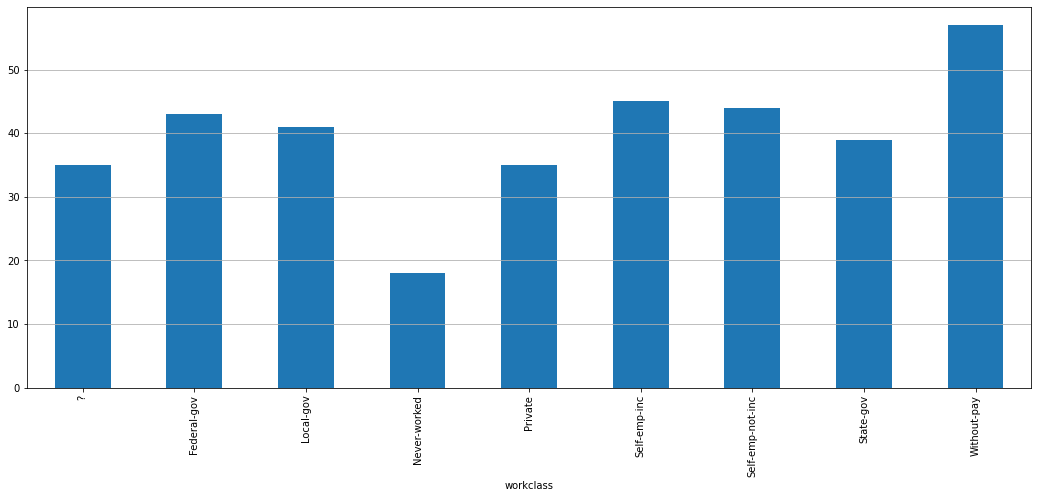

In [258]:
median_age_across_workclass = df.groupby('workclass')['age'].median()
print("Median 'age' across differenct 'workclass' :")
print("--------------------------------------------")
print(median_age_across_workclass)
df.groupby('workclass')['age'].median().plot(kind='bar')
plt.grid(which='both',axis='y')
plt.show()

#### Insight:
    1.Category "Without-pay" of variable 'workclass' has highest Median age which is 57.
    2.Category "Never-worked" of variable 'workclass' has lowest Median age which is 18.
    3.Median age values for all the ramaining variables are between 35 and 45.

_________________

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>6. Compare the mean and trimmed mean of capital gain and comment on the presence of outliers</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [208]:
from scipy.stats import trim_mean

In [209]:
df.head(2)

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,1,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,1,0,4356,18,United-States,<=50K


In [210]:
trimed_mean=trim_mean(df['capital.gain'],proportiontocut=0.01)
print("Trimmed mean of variable 'Capital.gain' is : ",trimed_mean)

Trimmed mean of variable 'Capital.gain' is :  493.7085331077058


In [211]:
mean=np.mean(df['capital.gain'])
print("Mean of variable 'Capital.gain' is : ",mean)

Mean of variable 'Capital.gain' is :  1077.6488437087312


`Mean and Trimmed_mean of variable "Capital.gain" are far from each other.`

_____________________

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>7. What is the percentage of the Asian-Pac-Islander race people in the data? </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [212]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education.num',
       'marital.status', 'occupation', 'relationship', 'race', 'sex',
       'capital.gain', 'capital.loss', 'hours.per.week', 'native.country',
       'income'],
      dtype='object')

There are 3.0 % of 'Asian-Pac-Islander' people


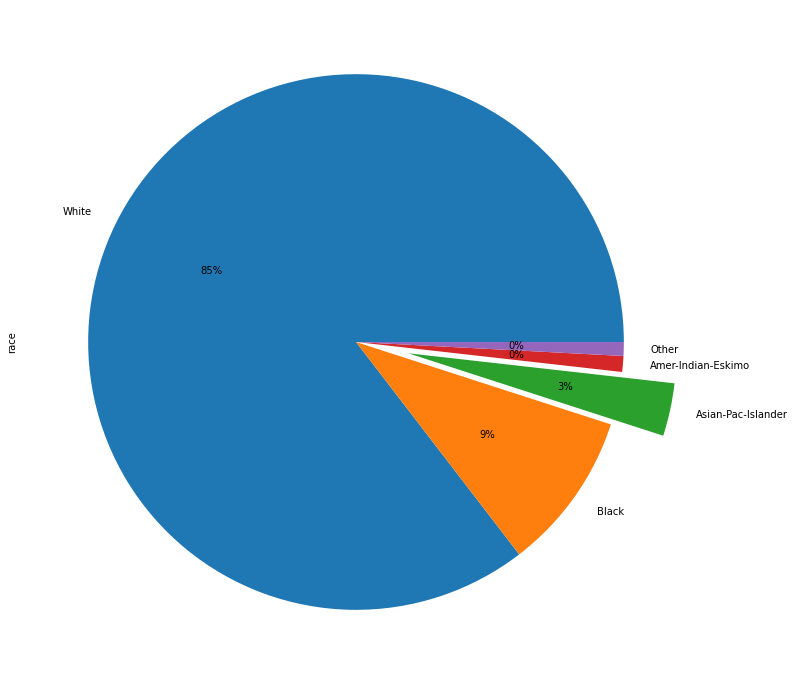

In [213]:
plt.figure(figsize=(12,20))
a=np.round((df['race'].value_counts()/df.shape[0])*100)
df['race'].value_counts().plot(kind='pie',autopct="%i%%",explode=[0.0,0.0,0.2,0.0,0.0])
print(f"There are {a['Asian-Pac-Islander'] } % of 'Asian-Pac-Islander' people")

#### Insight:
    There are 3 % of 'Asian-Pac-Islander' people in the data.

<a id="md"> </a>
## 3. Measures of Dispersion

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>8. Which occupation has more variability in the working hours</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [214]:
df.head(2)

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,1,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,1,0,4356,18,United-States,<=50K


'Farming-fishing' occupation has more variability in working hours which is 299.9878140950437


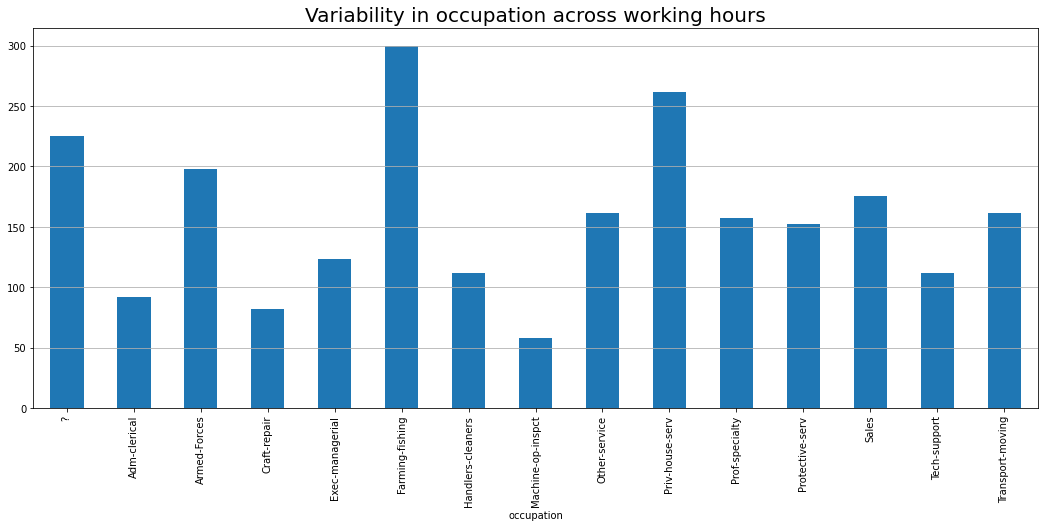

In [259]:
df.groupby('occupation')['hours.per.week'].var().plot(kind='bar')
a =df.groupby('occupation')['hours.per.week'].var()[df.groupby('occupation')['hours.per.week'].var() == df.groupby('occupation')['hours.per.week'].var().max()]
print(f"'{a.index[0]}' occupation has more variability in working hours which is {a.values[0]}")
plt.grid(axis='y')
plt.title("Variability in occupation across working hours",fontsize=20)
plt.show()

'Farming-fishing' occupation has more variability in working hours which is 299.9878140950437


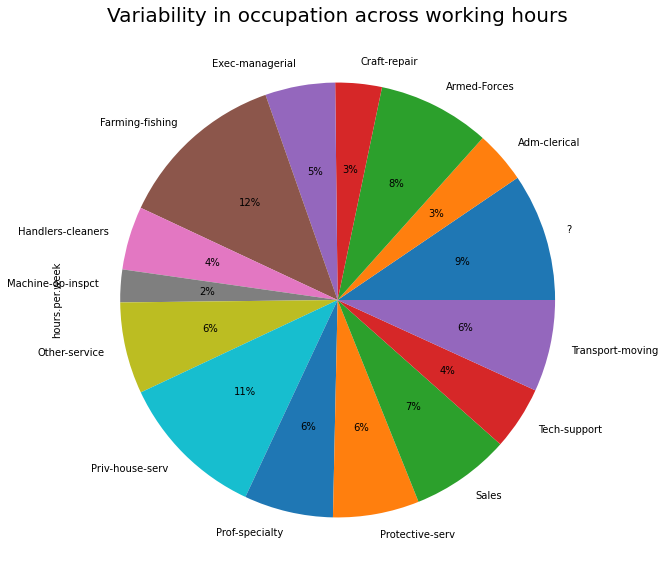

In [216]:
plt.figure(figsize=(10,10))
df.groupby('occupation')['hours.per.week'].var().plot(kind='pie',autopct="%i%%")
a =df.groupby('occupation')['hours.per.week'].var()[df.groupby('occupation')['hours.per.week'].var() == df.groupby('occupation')['hours.per.week'].var().max()]
print(f"'{a.index[0]}' occupation has more variability in working hours which is {a.values[0]}")
plt.grid(axis='y')
plt.title("Variability in occupation across working hours",fontsize=20)
plt.show()

#### Insight:
    "Farming-Fishing" occupation has more variability in working hours which is 300 i.e 12 % from variation across all the categories.

______________

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b> 9. What is the range of the middle 50% of working hours per week?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [217]:
df.head(2)

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,1,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,1,0,4356,18,United-States,<=50K


In [218]:
q1=df['hours.per.week'].quantile(0.25)
q3=df['hours.per.week'].quantile(0.75)
middle_50_percent=q3-q1
print("range of the middle 50% of working hours per week is ",middle_50_percent)

range of the middle 50% of working hours per week is  5.0


range of the middle 50% of working hours per week is  5.0


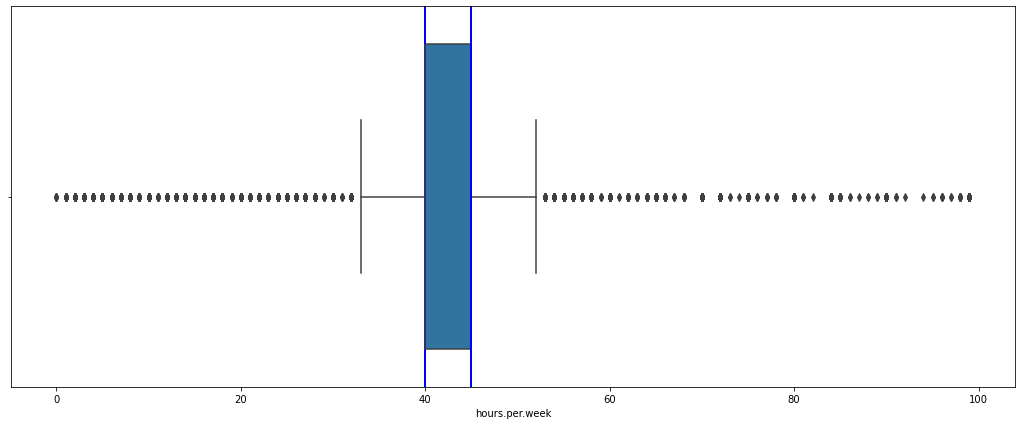

In [219]:
sns.boxplot(df['hours.per.week'])
plt.axvline(q1,color="blue",linewidth=2)
plt.axvline(q3,color="blue",linewidth=2)
middle_50_percent=q3-q1
print("range of the middle 50% of working hours per week is ",middle_50_percent)
plt.show()

#### Insight:
    5 hours/week is the range of the middle 50 % (i.e IQR ) of working hours per week.

________________________

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>10. Are there any variables which can be excluded from further analysis based on their variability?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [220]:
df.head(2)

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,1,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,1,0,4356,18,United-States,<=50K


In [221]:
df_num=df.select_dtypes(include=np.number)
df_num.std()

age                   13.640433
fnlwgt            105549.977697
education.num          2.572720
capital.gain        7385.292085
capital.loss         402.960219
hours.per.week        12.358681
dtype: float64

_____________________

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>11. Find the percentage of variation in work hours for each workclass. Give an appropriate interpretation</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [222]:
df.head(2)

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,1,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,1,0,4356,18,United-States,<=50K


cv= var / abs(mean)

workclass
?                   46.711116
Federal-gov         21.360037
Local-gov           26.283120
Never-worked              NaN
Private             27.954085
Self-emp-inc        28.473900
Self-emp-not-inc    37.537713
State-gov           29.968071
Without-pay         53.059084
Name: hours.per.week, dtype: float64


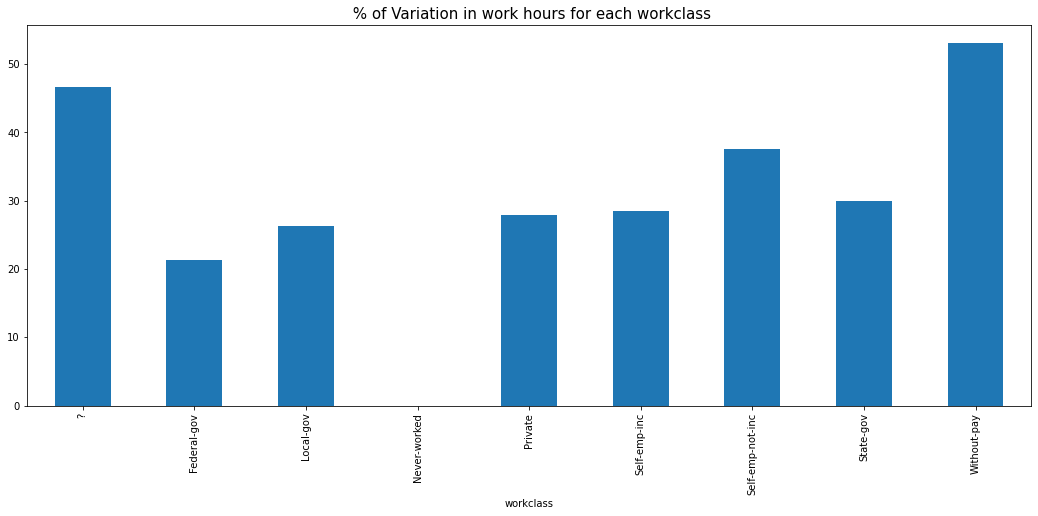

In [257]:
plt.figure(figsize=(18,7))
print(df.groupby('workclass')['hours.per.week'].std()/abs(df.groupby('workclass')['hours.per.week'].mean())*100)
(df.groupby('workclass')['hours.per.week'].std()/abs(df.groupby('workclass')['hours.per.week'].mean())*100).plot(kind='bar')
plt.title(" % of Variation in work hours for each workclass",fontsize=15)
plt.show()

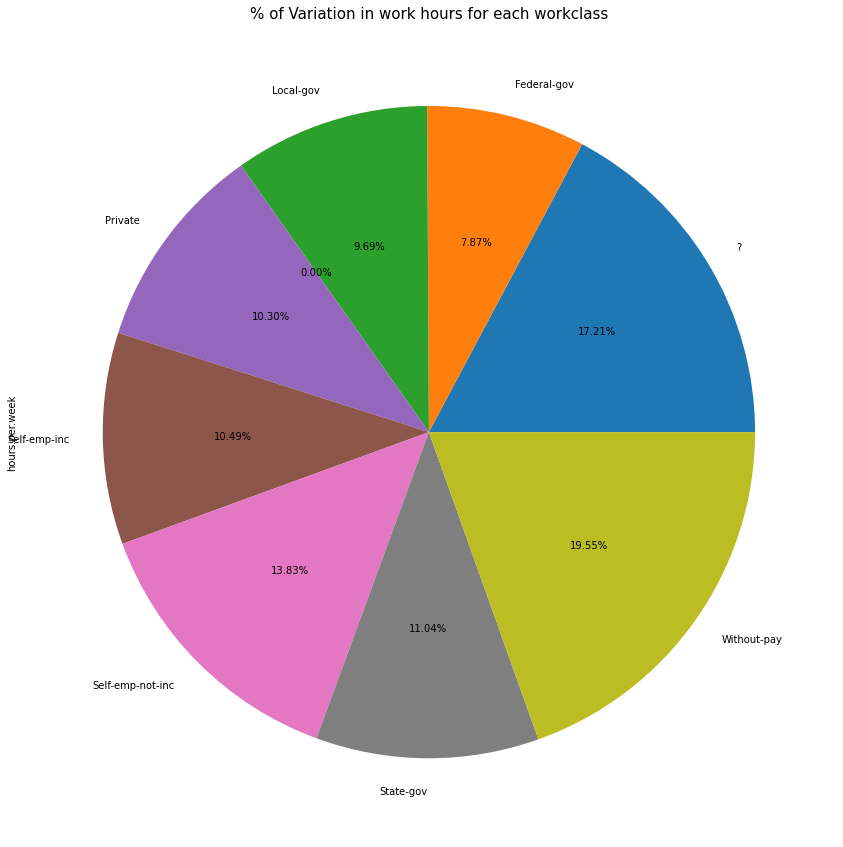

In [224]:
plt.figure(figsize=(18,15))
(df.groupby('workclass')['hours.per.week'].std()/abs(df.groupby('workclass')['hours.per.week'].mean())*100).plot(kind='pie',autopct="%1.2f%%")
plt.title("% of Variation in work hours for each workclass",fontsize=15)
plt.show()

#### Insight:
    Category "without-pay" has highest % of variation which is 53.05 i.e (19.55 %) in work hours for each workclass. 

<a id="dist"> </a>
## 4. Distribution of the Data

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>12. Define a function to plot the categories of the variable and find the category with highest frequency</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [225]:
df['occupation'].value_counts().index[0]

'Prof-specialty'

In [226]:
def plot(df=None): 
    for i in df.columns:
        if df[i].dtypes == "object":
            print(f'"{df[i].value_counts().index[0]}" is the category with highest frequency for variable "{ i }".\n')
            sns.countplot(df[i])
            plt.title(f"Countplot for variable '{ i }'",fontsize=15)
            plt.grid(which='both',axis='y',color='blue')
            plt.show()
            print("-----------------------------------------------------------------------------------\n")

"Private" is the category with highest frequency for variable "workclass".



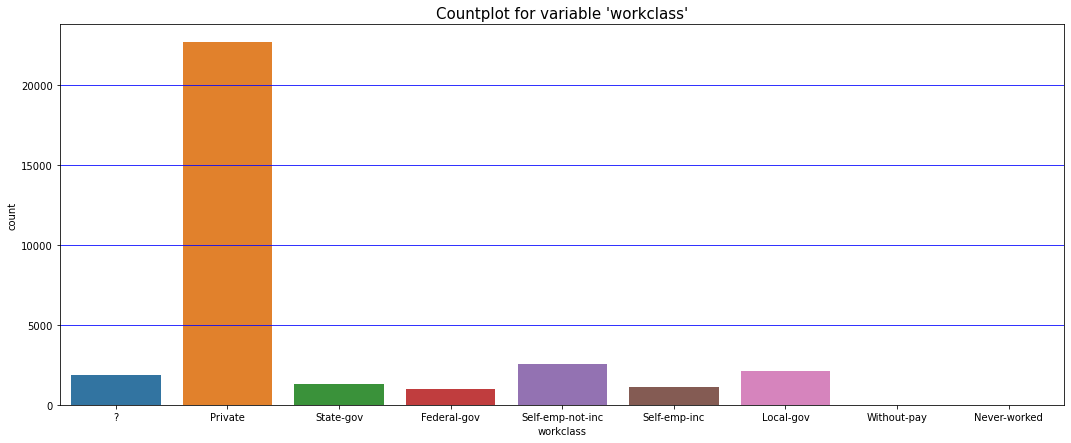

-----------------------------------------------------------------------------------

"HS-grad" is the category with highest frequency for variable "education".



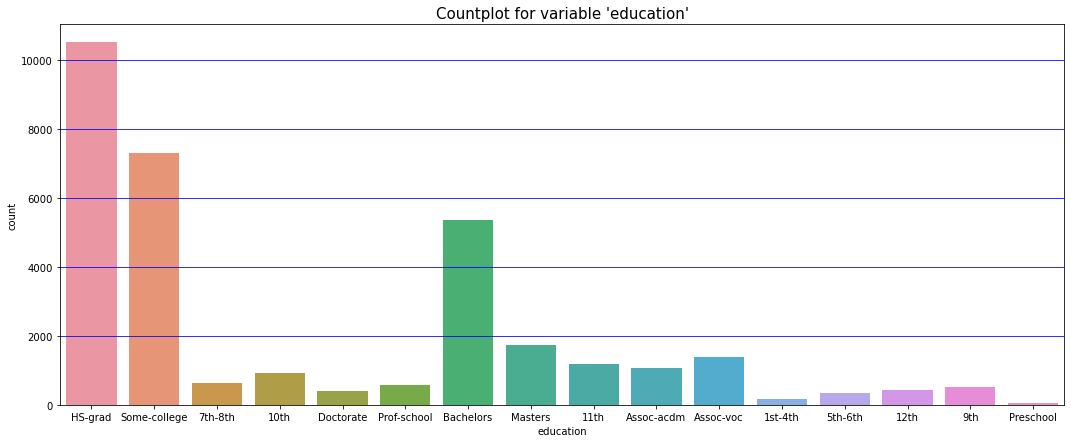

-----------------------------------------------------------------------------------

"Married-civ-spouse" is the category with highest frequency for variable "marital.status".



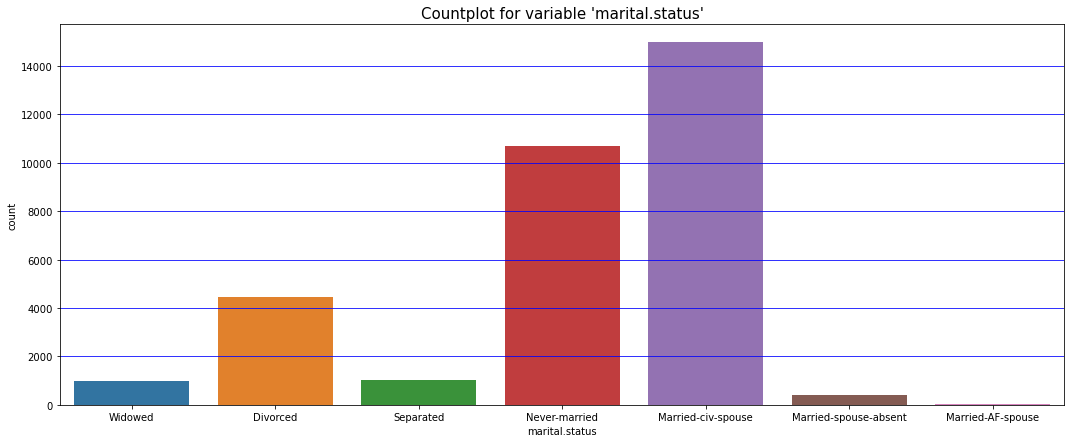

-----------------------------------------------------------------------------------

"Prof-specialty" is the category with highest frequency for variable "occupation".



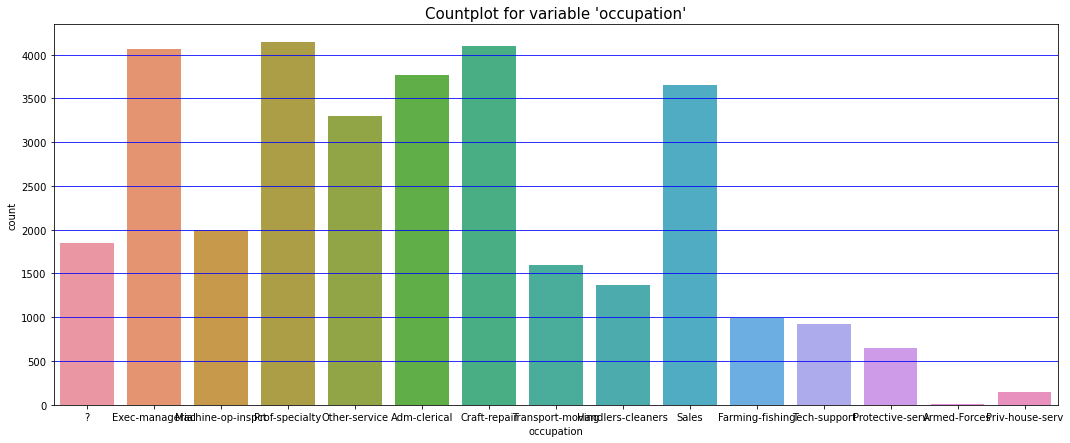

-----------------------------------------------------------------------------------

"Husband" is the category with highest frequency for variable "relationship".



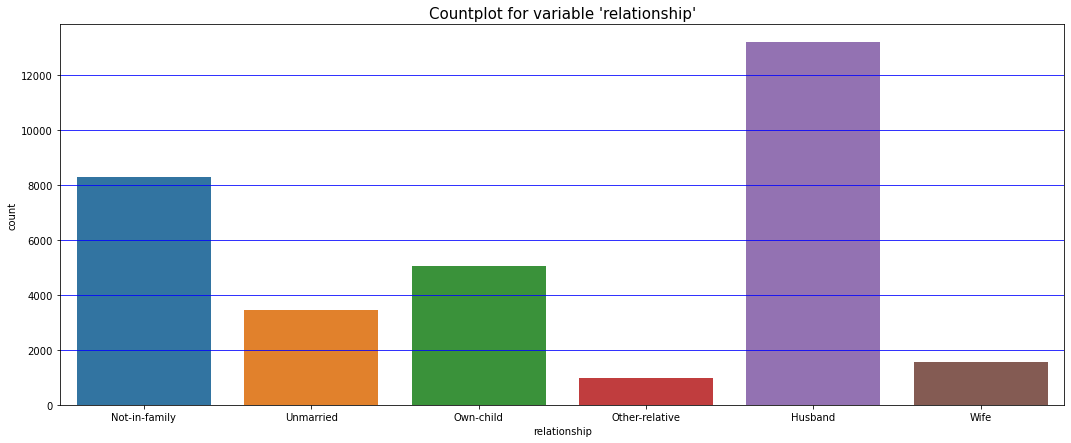

-----------------------------------------------------------------------------------

"White" is the category with highest frequency for variable "race".



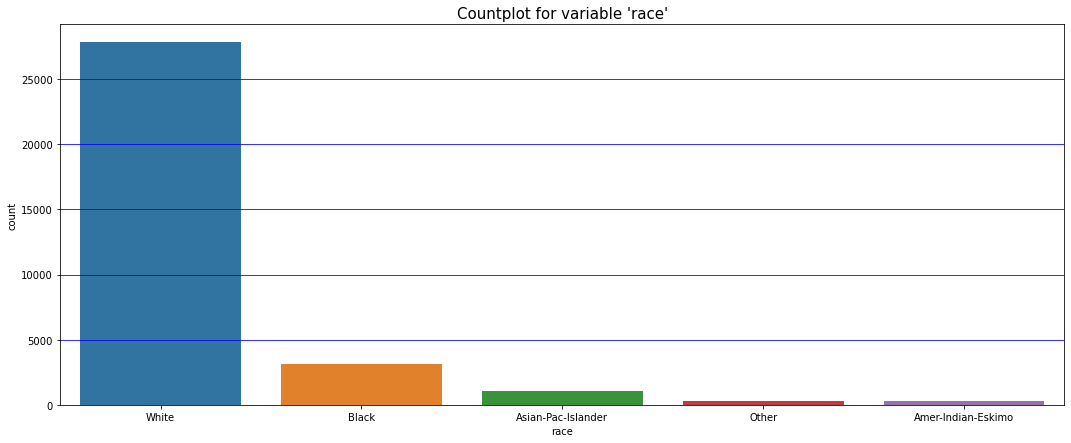

-----------------------------------------------------------------------------------

"0" is the category with highest frequency for variable "sex".



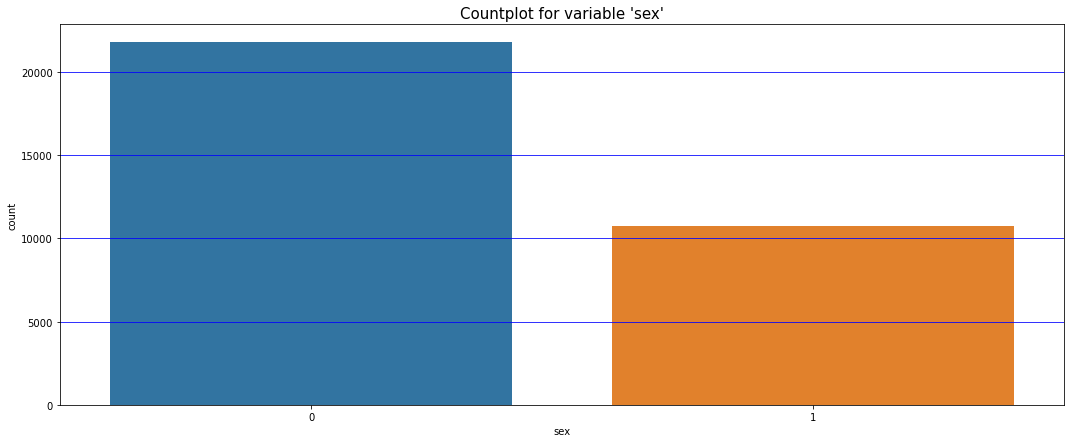

-----------------------------------------------------------------------------------

"United-States" is the category with highest frequency for variable "native.country".



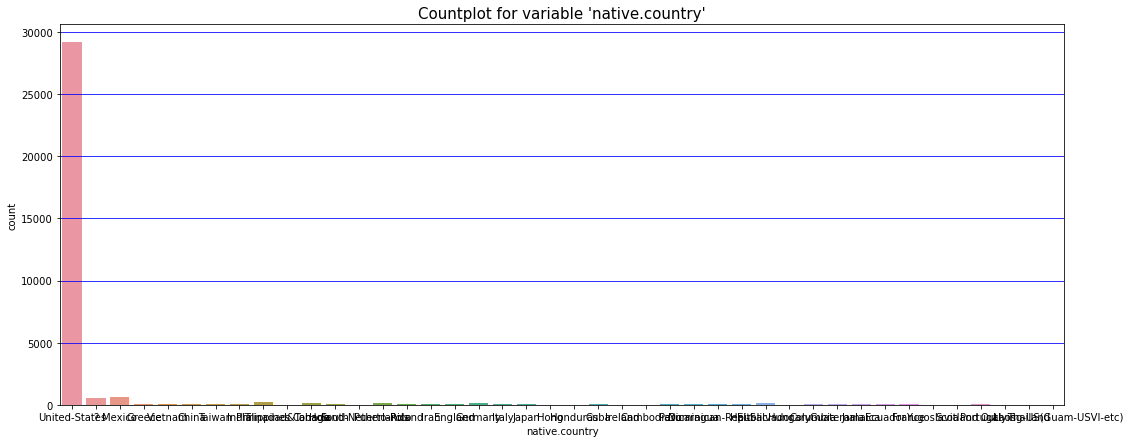

-----------------------------------------------------------------------------------

"<=50K" is the category with highest frequency for variable "income".



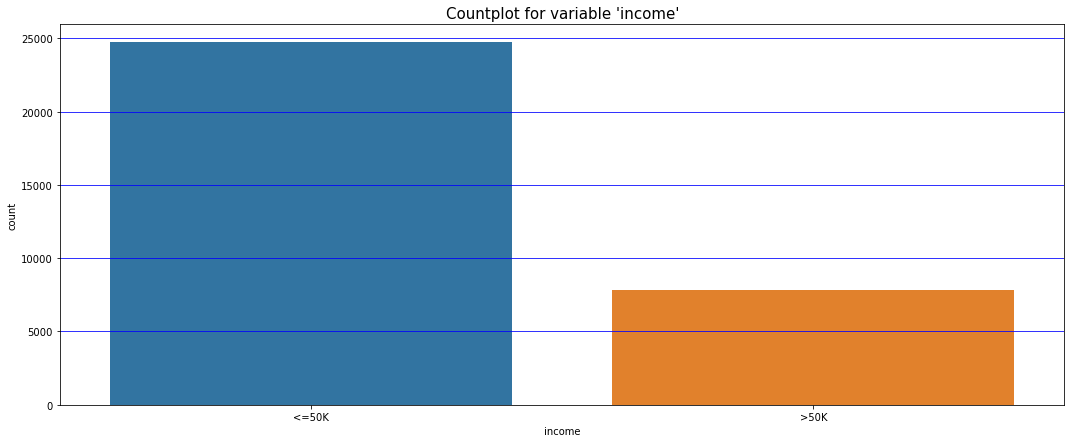

-----------------------------------------------------------------------------------



In [227]:
plot(df)

_____________

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>13. Is there any variable which is normally distributed?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [228]:
df.skew()

age                0.558743
fnlwgt             1.446980
education.num     -0.311676
sex                0.719293
capital.gain      11.953848
capital.loss       4.594629
hours.per.week     0.222241
dtype: float64

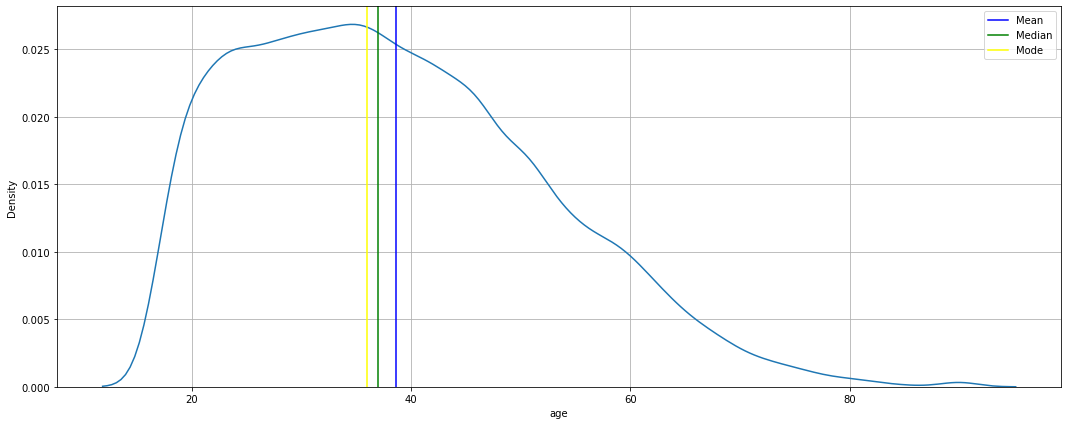

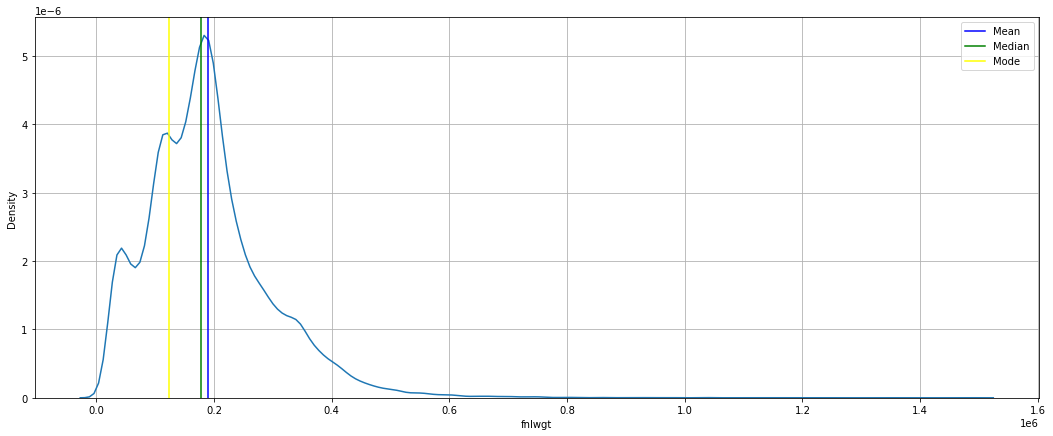

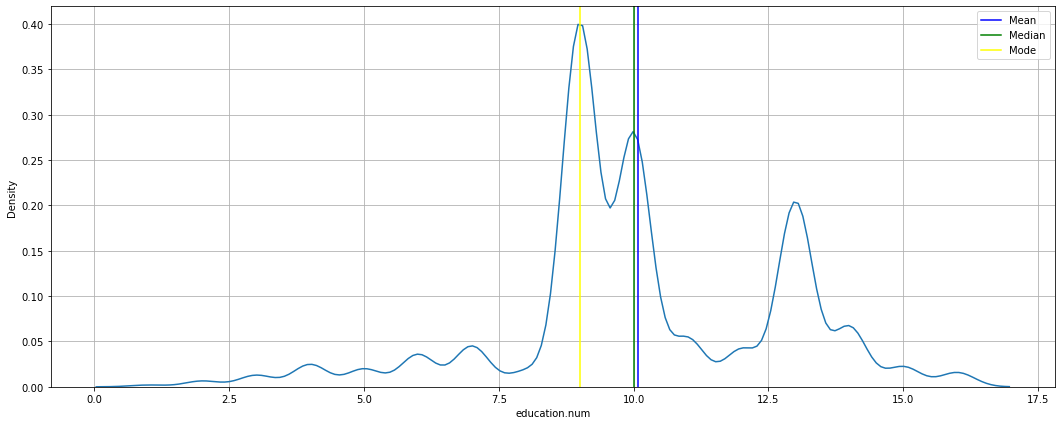

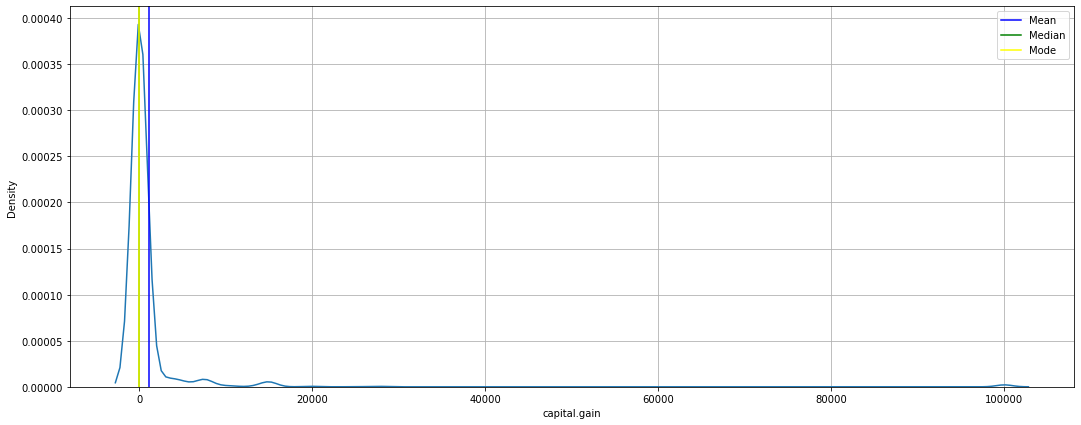

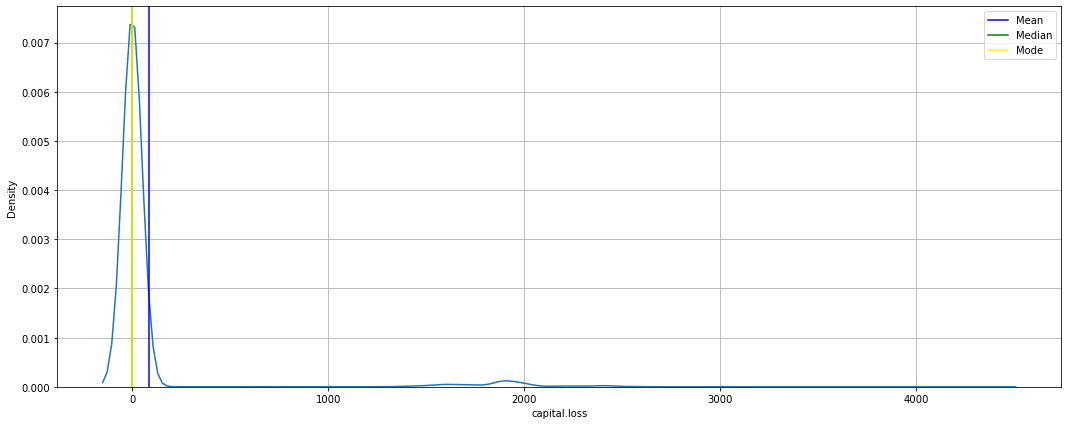

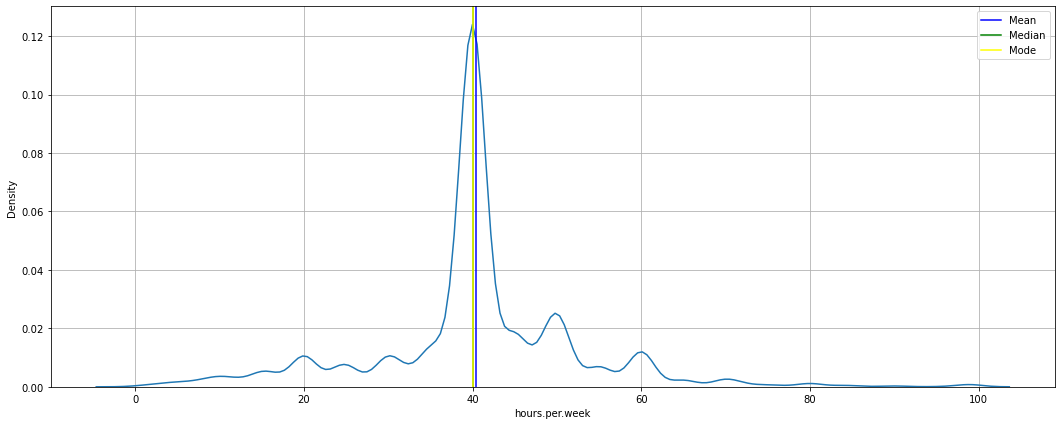

In [254]:
for i in df.columns :
    if df[i].dtypes == "int64" or df[i].dtypes == "float64":
        sns.kdeplot(df[i])
        plt.axvline(df[i].mean(),color='blue',label="Mean")
        plt.axvline(df[i].median(),color='green',label="Median")
        plt.axvline(df[i].mode()[0],color='yellow',label="Mode")
        plt.grid()
        plt.legend()
        plt.show()

#### Insight:
    From skewness and Mean,Median & Mode values from the above kde plot we can say that variable "hours.per.week" is nearly normally distributed.

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>14. Identify the working class for most of the population in the data</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [230]:
df.head(2)

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,1,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,1,0,4356,18,United-States,<=50K


Private             22696
Self-emp-not-inc     2541
Local-gov            2093
?                    1836
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: workclass, dtype: int64


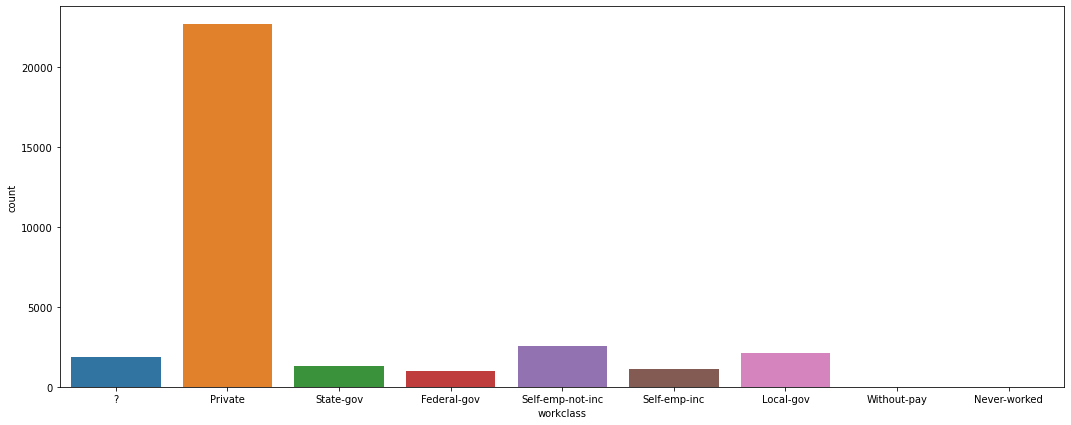

In [231]:
print(df['workclass'].value_counts())
sns.countplot(data=df,x='workclass')
plt.show()

#### Insight:
    "Private" is the working class for most of the population in the data.

________________

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>15. For how much time are most of the individuals working per week?
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [232]:
df.head(2)

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,1,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,1,0,4356,18,United-States,<=50K


Most of the individuals working per week is 40 hours.
-----------------------------------------------------


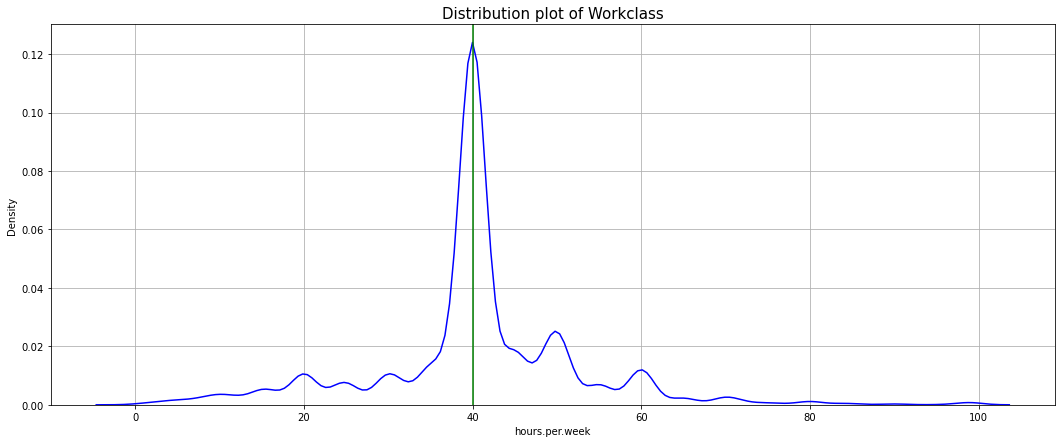

In [233]:
sns.kdeplot(df['hours.per.week'],color='blue')
plt.axvline(df['hours.per.week'].mode()[0],color='green')
plt.title("Distribution plot of Workclass",fontsize=15)
print(f"Most of the individuals working per week is { df['hours.per.week'].mode()[0] } hours.")
print("-----------------------------------------------------")
plt.grid()
plt.show()

#### Insight:
    Most of the individuals working per week is 40 hours.

_______________

<a id="sk"> </a>
## 5. Skewness and kurtosis

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>16. Is there any negatively skewed feature. Support your answer with a metric and the plot</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [234]:
df_num.skew()

age                0.558743
fnlwgt             1.446980
education.num     -0.311676
capital.gain      11.953848
capital.loss       4.594629
hours.per.week     0.222241
dtype: float64

Skewness for variable 'age' is :  0.5587433694130483
----------------------------------------------------------


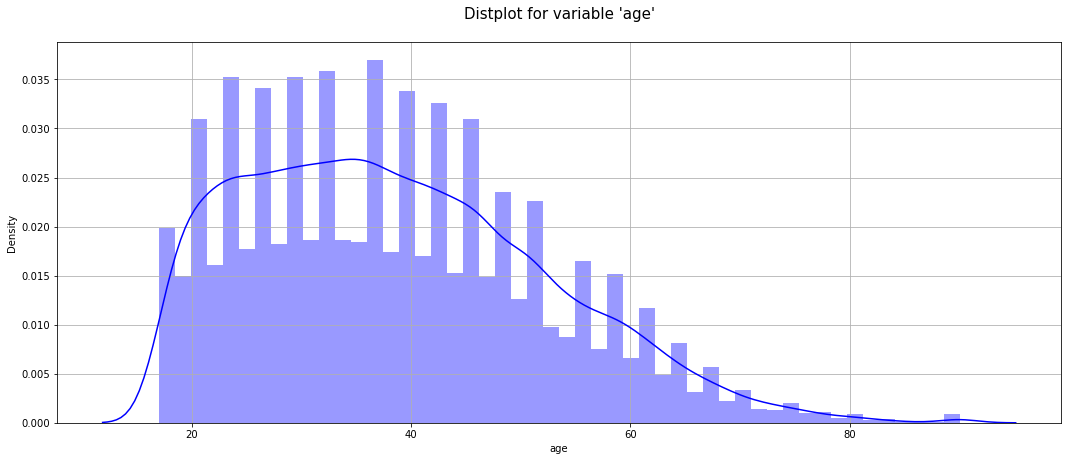

Skewness for variable 'fnlwgt' is :  1.4469800945789828
----------------------------------------------------------


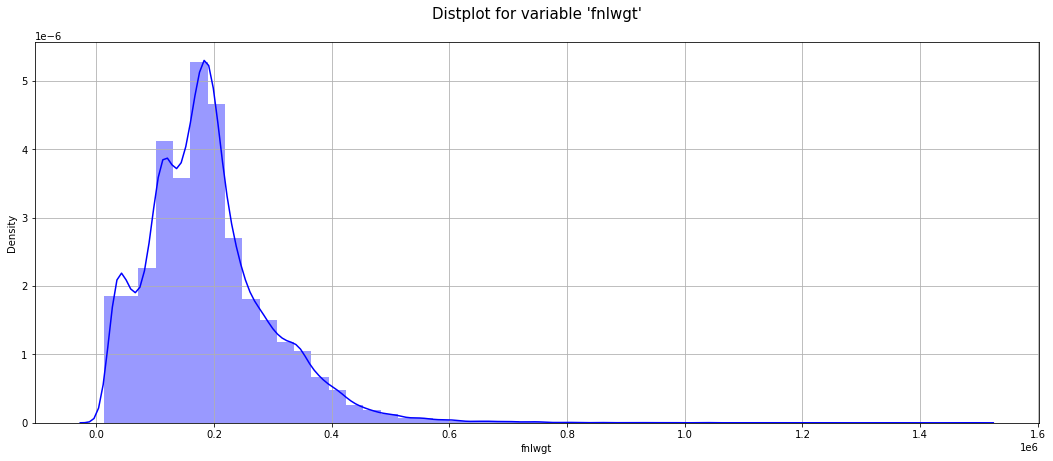

Skewness for variable 'education.num' is :  -0.31167586791022966
----------------------------------------------------------


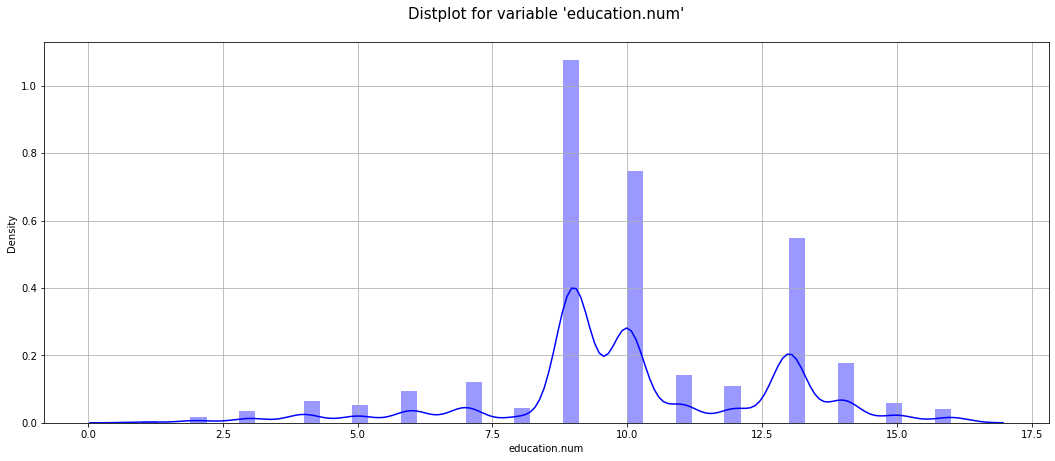

Skewness for variable 'capital.gain' is :  11.953847687699794
----------------------------------------------------------


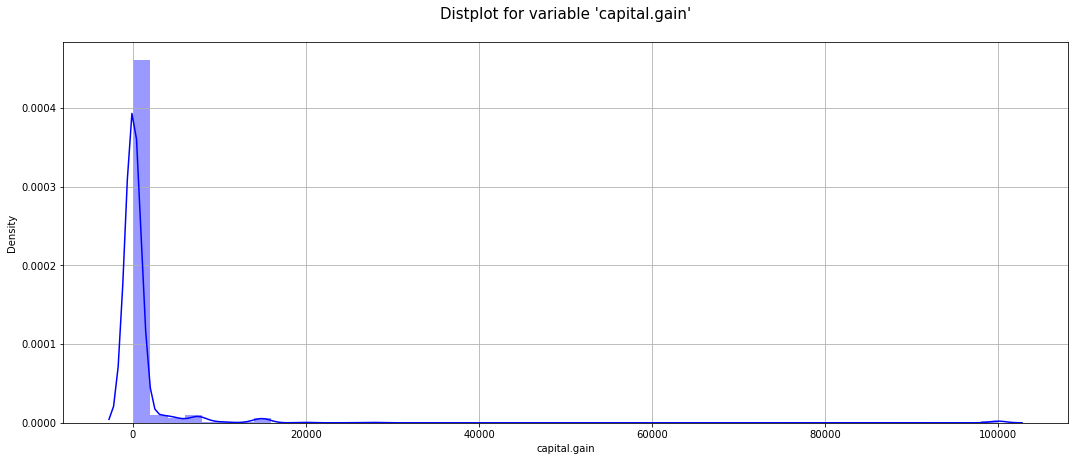

Skewness for variable 'capital.loss' is :  4.594629121679696
----------------------------------------------------------


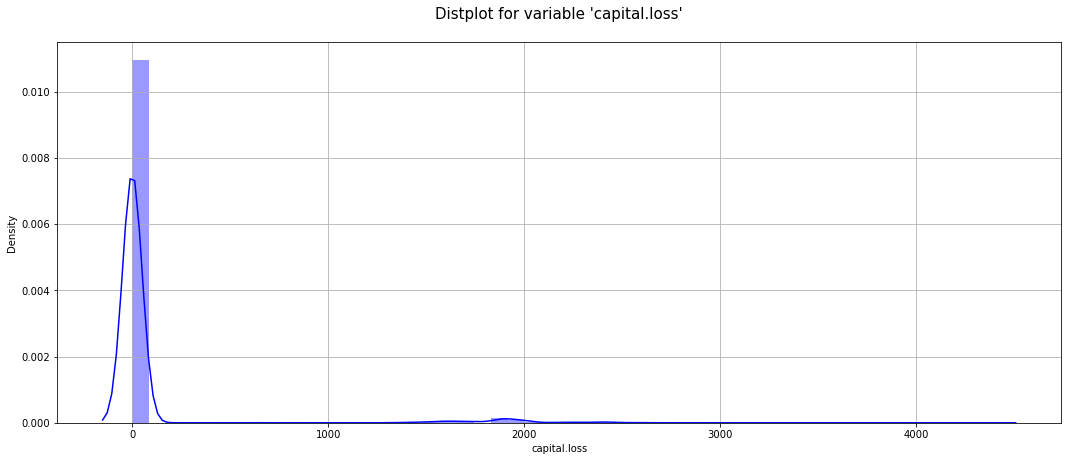

Skewness for variable 'hours.per.week' is :  0.22224067717684567
----------------------------------------------------------


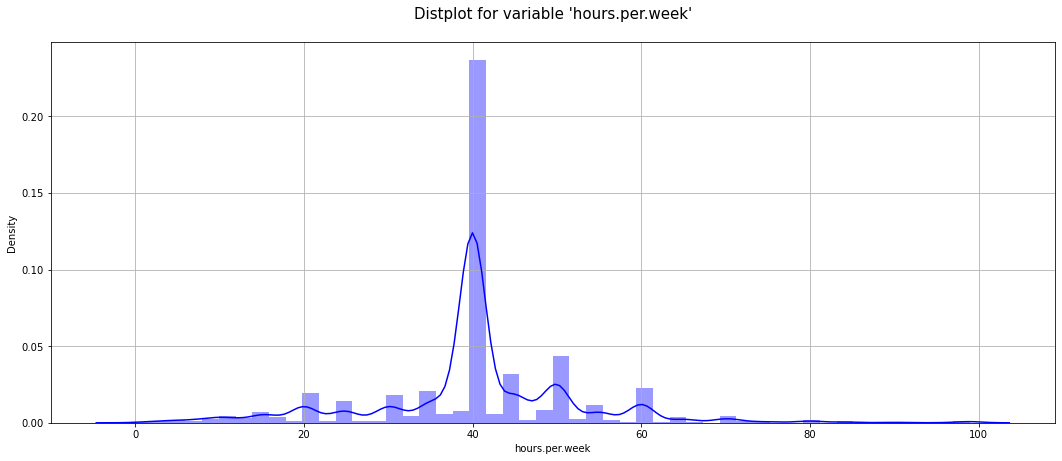

In [235]:
for i in df_num.columns:   
    sns.distplot(df[i],color='blue')
    print(f"Skewness for variable '{ i }' is : ",df_num[i].skew())
    print("----------------------------------------------------------")
    plt.title(f"Distplot for variable '{ i }'\n",fontsize=15)
    plt.grid()
    plt.show()


#### Insight:
    Variable "education.num" is Negatively skewed and its skewness is -0.311676.

_________________________

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>17. Find the kurtosis of all the variables, and give appropriate interpretation</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [236]:
df.kurt()

age                -0.166127
fnlwgt              6.218811
education.num       0.623444
sex                -1.482709
capital.gain      154.799438
capital.loss       20.376802
hours.per.week      2.916782
dtype: float64

#### Conclusion:
1.Variables **`"fnlwgt","capital.gain","capital.loss","hours.per.week"`** are **`Leptokurtic. `**     
2.Variable **`"education.num"`**kurtosis value is close to 0 Hence it is Slightly**`Mesokurtic.`**     
3.Variable **`"age" & "sex"`** are **`Platykurtic`**.     

__________________

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>18. Identify the presence of extreme values in age using visualization techniques
</b>
                </font>
            </div>
        </td>
    </tr>
</table>

<AxesSubplot:xlabel='age'>

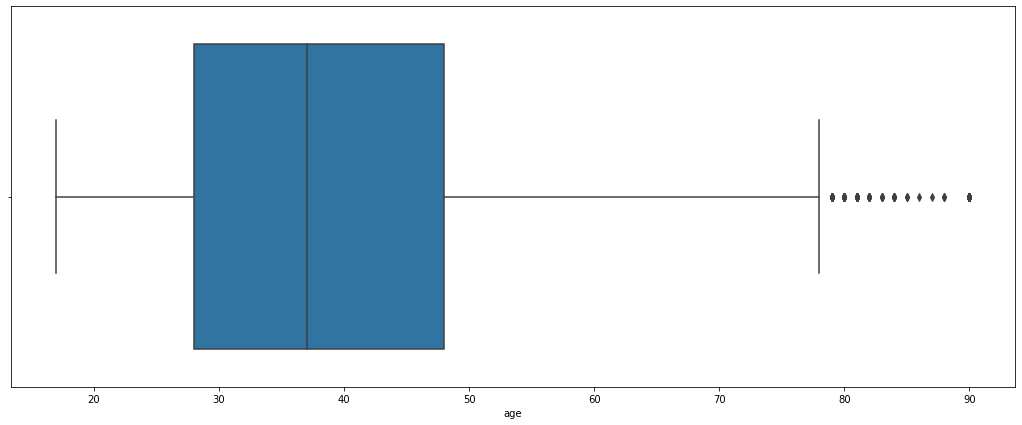

In [253]:
sns.boxplot(df['age'])

#### Insight:
`There are outliers present in variable` **`"age"`**.

_____________

<a id="corr"> </a>
## 6. Correlation

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>19. Is there any effect of age on the working hours of a person?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [238]:
df.head(2)

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,1,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,1,0,4356,18,United-States,<=50K


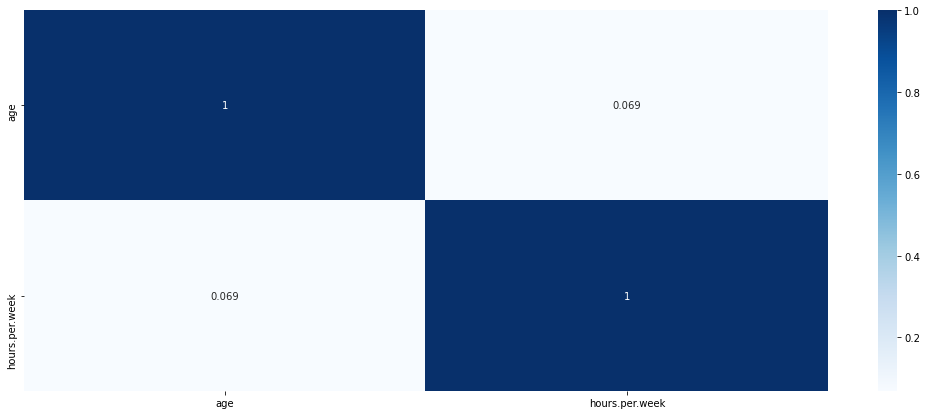

In [247]:
sns.heatmap(df[['age','hours.per.week']].corr(),annot=True,cmap="Blues")
plt.show()

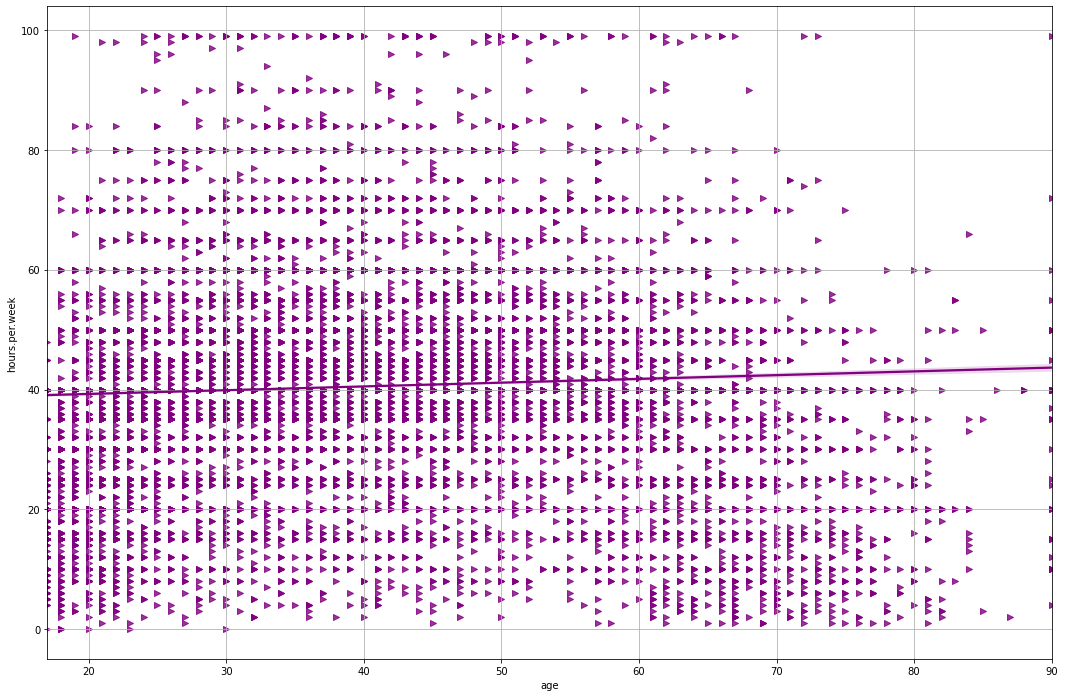

In [240]:
plt.figure(figsize=(18,12))
sns.regplot(data=df,x='age',y='hours.per.week',marker=">",color='purple')
plt.grid()
plt.show()

#### Insight:
`varriables` **`"age"`** `&` **`"hours.per.week"`** `are not correlated.`

_________________

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>20. Visualize the upper triangular correlation matrix</b>
                </font>
            </div>
        </td>
    </tr>
</table>

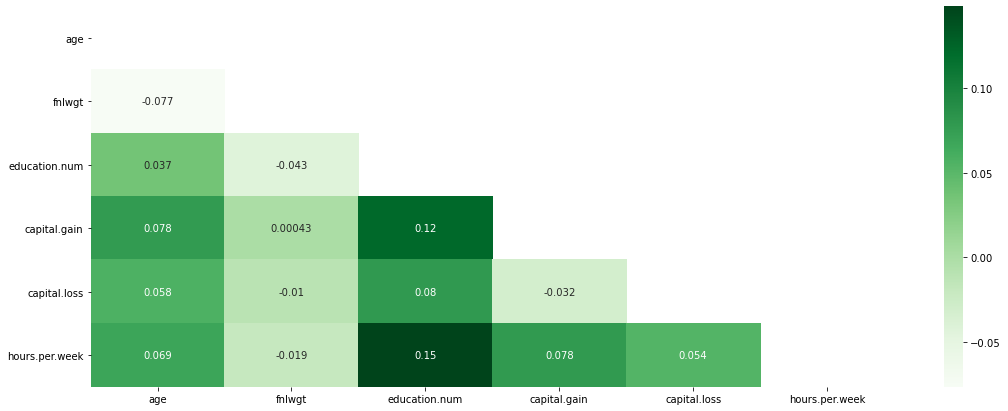

In [251]:
m=np.triu(np.ones_like(df.corr()))
sns.heatmap(df.corr(),annot=True,mask=m,cmap="Greens")
plt.show()

#### Insight:
    Variables are not correlated among themselves.

 **`------------------------------------------------- End -------------------------------------------`**